In [2]:
import numpy as np
import pandas as pd

import ipympl
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

import data_util as du
import performance_util as pu
import bayes_classifier as bayes
import knn_classifier as knn

from sklearn.decomposition import PCA
# from PCA import PCA
import kmeans

%matplotlib inline

In [3]:
data_dir = '../data/fashion_mnist/'
random_seed = 1
np.set_printoptions(precision=4)

In [19]:
X_train, Y_train = du.load_fashion_mnist(data_dir + 'train/')
X_test, Y_test = du.load_fashion_mnist(data_dir + 't10k/')

X_train, mu, std = du.normalize(X_train)
X_test = (X_test - mu) / std

print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

MemoryError: 

# Visualization of One Image

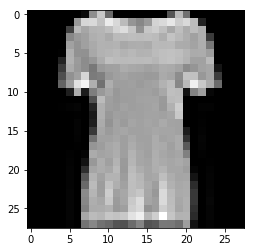

In [23]:
plt.imshow(np.reshape(X_train[10], (-1, 28)))
plt.gray()

# PCA (n_components = 49)

In [4]:
pca = PCA(n_components=49)
pca.fit(X_train)

#print(np.sum(pca.explained_variance_ratio_))

X_train_reduced_1 = pca.transform(X_train)
X_test_reduced_1 = pca.transform(X_test)

# Print reduced image
plt.imshow(np.reshape(X_train_reduced_1[10], (-1, 7)))
plt.gray()

print(X_train_reduced_1.shape)
print(X_test_reduced_1.shape)

0.7984902923536729
(60000, 49)
(10000, 49)


# Supervised Learning

## Bayes Classifier

### Training and Parameter Tuning

#### Class Conditional Distribution - (GMM - components = 4)

In [5]:
parameters = [4, 0.001, 50, X_train_reduced_1.shape[1], 0.0001]

model = bayes.bayes_classifier(estimator_type = 'GMM', param = parameters)
model.train(X_train_reduced_1, Y_train)

Class 0
Didn't converge, ran for 2 iterations
Class 1
Didn't converge, ran for 2 iterations
Class 2


KeyboardInterrupt: 

### Testing

In [ ]:
Y_pred = model.predict(X_test_reduced_1)

print("Accuracy on Test Set = ", pu.model_accuracy(Y_pred, Y_test))
print("Precision per Class")
print(pu.model_precision(Y_pred, Y_test, 10).T[0, :])
print("Recall per Class")
print(pu.model_recall(Y_pred, Y_test, 10).T[0, :])
print("F1 Score per Class")
print(pu.model_f1(Y_pred, Y_test, 10).T[0, :])
print("Macro Average Precision, Recall and F1 Score")
print(pu.model_macro_average(Y_pred, Y_test, 10))
print("Micro Average Precision, Recall and F1 Score")
print(pu.model_micro_average(Y_pred, Y_test, 10))

print()
print()

#### Class Conditional Density (GMM - Components = 2)

In [ ]:
parameters = [2, 0.001, 50, X_train_reduced_1.shape[1], 0.0001]

model = bayes.bayes_classifier(estimator_type = 'GMM', param = parameters)
model.train(X_train_reduced_1, Y_train)

### Testing

In [ ]:
Y_pred = model.predict(X_test_reduced_1)

print("Accuracy on Test Set = ", pu.model_accuracy(Y_pred, Y_test))
print("Precision per Class")
print(pu.model_precision(Y_pred, Y_test, 10).T[0, :])
print("Recall per Class")
print(pu.model_recall(Y_pred, Y_test, 10).T[0, :])
print("F1 Score per Class")
print(pu.model_f1(Y_pred, Y_test, 10).T[0, :])
print("Macro Average Precision, Recall and F1 Score")
print(pu.model_macro_average(Y_pred, Y_test, 10))
print("Micro Average Precision, Recall and F1 Score")
print(pu.model_micro_average(Y_pred, Y_test, 10))

print()
print()

### Training and Parameter Tuning (PCA - n_components = 25)

In [ ]:
pca = PCA(n_components=25)
pca.fit(X_train)

#print(np.sum(pca.explained_variance_ratio_))

X_train_reduced_2 = pca.transform(X_train)
X_test_reduced_2 = pca.transform(X_test)

# Print reduced image
plt.imshow(np.reshape(X_train_reduced_2[10], (-1, 7)))
plt.gray()

print(X_train_reduced_2.shape)
print(X_test_reduced_2.shape)

### Class Conditional Density (GMM - n_components = 4)

In [ ]:
parameters = [4, 0.001, 50, X_train_reduced_2.shape[1], 0.0001]

model = bayes.bayes_classifier(estimator_type = 'GMM', param = parameters)
model.train(X_train_reduced_2, Y_train)

### Testing

In [ ]:
Y_pred = model.predict(X_test_reduced_2)

print("Accuracy on Test Set = ", pu.model_accuracy(Y_pred, Y_test))
print("Precision per Class")
print(pu.model_precision(Y_pred, Y_test, 10).T[0, :])
print("Recall per Class")
print(pu.model_recall(Y_pred, Y_test, 10).T[0, :])
print("F1 Score per Class")
print(pu.model_f1(Y_pred, Y_test, 10).T[0, :])
print("Macro Average Precision, Recall and F1 Score")
print(pu.model_macro_average(Y_pred, Y_test, 10))
print("Micro Average Precision, Recall and F1 Score")
print(pu.model_micro_average(Y_pred, Y_test, 10))

print()
print()

### Class Conditional Density (GMM - n_components = 2)

In [ ]:
parameters = [2, 0.001, 50, X_train_reduced.shape_2[1], 0.0001]

model = bayes.bayes_classifier(estimator_type = 'GMM', param = parameters)
model.train(X_train_reduced_2, Y_train)

### Testing

In [ ]:
Y_pred = model.predict(X_test_reduced_2)

print("Accuracy on Test Set = ", pu.model_accuracy(Y_pred, Y_test))
print("Precision per Class")
print(pu.model_precision(Y_pred, Y_test, 10).T[0, :])
print("Recall per Class")
print(pu.model_recall(Y_pred, Y_test, 10).T[0, :])
print("F1 Score per Class")
print(pu.model_f1(Y_pred, Y_test, 10).T[0, :])
print("Macro Average Precision, Recall and F1 Score")
print(pu.model_macro_average(Y_pred, Y_test, 10))
print("Micro Average Precision, Recall and F1 Score")
print(pu.model_micro_average(Y_pred, Y_test, 10))

print()
print()

### Training and Parameter Tuning (PCA - n_components = 9)

In [ ]:
pca = PCA(n_components=25)
pca.fit(X_train)

#print(np.sum(pca.explained_variance_ratio_))

X_train_reduced_3 = pca.transform(X_train)
X_test_reduced_3 = pca.transform(X_test)

# Print reduced image
plt.imshow(np.reshape(X_train_reduced_3[10], (-1, 7)))
plt.gray()

print(X_train_reduced_3.shape)
print(X_test_reduced_3.shape)

In [ ]:
### Class Conditional Density (GMM - n_components = 4)

In [ ]:
parameters = [4, 0.001, 50, X_train_reduced_3.shape[1], 0.0001]

model = bayes.bayes_classifier(estimator_type = 'GMM', param = parameters)
model.train(X_train_reduced_3, Y_train)

In [ ]:
### Testing

In [ ]:
Y_pred = model.predict(X_test_reduced_3)

print("Accuracy on Test Set = ", pu.model_accuracy(Y_pred, Y_test))
print("Precision per Class")
print(pu.model_precision(Y_pred, Y_test, 10).T[0, :])
print("Recall per Class")
print(pu.model_recall(Y_pred, Y_test, 10).T[0, :])
print("F1 Score per Class")
print(pu.model_f1(Y_pred, Y_test, 10).T[0, :])
print("Macro Average Precision, Recall and F1 Score")
print(pu.model_macro_average(Y_pred, Y_test, 10))
print("Micro Average Precision, Recall and F1 Score")
print(pu.model_micro_average(Y_pred, Y_test, 10))

print()
print()

In [ ]:
### Class Conditional Density (GMM - n_components = 2)

In [ ]:
parameters = [2, 0.001, 50, X_train_reduced_3.shape[1], 0.0001]

model = bayes.bayes_classifier(estimator_type = 'GMM', param = parameters)
model.train(X_train_reduced_3, Y_train)

In [ ]:
### Testing

In [ ]:
Y_pred = model.predict(X_test_reduced_3)

print("Accuracy on Test Set = ", pu.model_accuracy(Y_pred, Y_test))
print("Precision per Class")
print(pu.model_precision(Y_pred, Y_test, 10).T[0, :])
print("Recall per Class")
print(pu.model_recall(Y_pred, Y_test, 10).T[0, :])
print("F1 Score per Class")
print(pu.model_f1(Y_pred, Y_test, 10).T[0, :])
print("Macro Average Precision, Recall and F1 Score")
print(pu.model_macro_average(Y_pred, Y_test, 10))
print("Micro Average Precision, Recall and F1 Score")
print(pu.model_micro_average(Y_pred, Y_test, 10))

print()
print()

In [ ]:
# Unsupervised Learning
## K-Means Classifier (n-components = 10)
### (PCA - n_components = 25)

In [ ]:
model = kmeans(10, 20)
model.train(X_train_reduced_2)
Y_pred = model.predict(X_test_reduced_2)

In [ ]:
### Testing

In [ ]:
Y_pred = model.predict(X_test_reduced_2)

print("Accuracy on Test Set = ", pu.model_accuracy(Y_pred, Y_test))
print("Precision per Class")
print(pu.model_precision(Y_pred, Y_test, 10).T[0, :])
print("Recall per Class")
print(pu.model_recall(Y_pred, Y_test, 10).T[0, :])
print("F1 Score per Class")
print(pu.model_f1(Y_pred, Y_test, 10).T[0, :])
print("Macro Average Precision, Recall and F1 Score")
print(pu.model_macro_average(Y_pred, Y_test, 10))
print("Micro Average Precision, Recall and F1 Score")
print(pu.model_micro_average(Y_pred, Y_test, 10))

print()
print()

In [ ]:
## K-Means Classifier (n-components = 10)
### (PCA - n_components = 9)

In [ ]:
model = kmeans(10, 20)
model.train(X_train_reduced_3)
Y_pred = model.predict(X_test_reduced_3)

In [ ]:
### Testing

In [ ]:
Y_pred = model.predict(X_test_reduced_3)

print("Accuracy on Test Set = ", pu.model_accuracy(Y_pred, Y_test))
print("Precision per Class")
print(pu.model_precision(Y_pred, Y_test, 10).T[0, :])
print("Recall per Class")
print(pu.model_recall(Y_pred, Y_test, 10).T[0, :])
print("F1 Score per Class")
print(pu.model_f1(Y_pred, Y_test, 10).T[0, :])
print("Macro Average Precision, Recall and F1 Score")
print(pu.model_macro_average(Y_pred, Y_test, 10))
print("Micro Average Precision, Recall and F1 Score")
print(pu.model_micro_average(Y_pred, Y_test, 10))

print()
print()